# 简介
有限状态机（Finite-state machine, FSM），又称有限状态自动机，简称状态机，是表示有限个状态以及在这些状态之间的转移和动作等行为的数学模型。

## 为什么应该是状态机给与高度重视？
状态机并不仅仅是一种算法，而是日常生活中解决问题的常用思维！

首先，任何的系统都是由多个实体组成的，每个实体有多个属性，每个属性多个不同的取值（状态）。

实体的状态 受外界事件Events的影响，处于不停的变化过程中。

实际的系统如何运作呢？

首先，定义系统。

建立多个实体，初始化每个实体（即初始化每个属性的状态）。

制定规则：事件，事件对属性值的影响。


输入事件序列，观察系统的变化！


## transitions
transitions是一个由Python实现的轻量级的、面向对象的有限状态机框架。

https://github.com/pytransitions/transitions

transitions最基本的用法如下：

1. 先自定义一个类Matter
2. 定义一系列状态和状态转移（定义状态和状态转移有多种方式，官网上给了最快速理解的一个例子）
3. 初始化状态机
4. 获取当前的状态或者进行转化

## installation

In [1]:
# !pip install transitions

     |████████████████████████████████| 51kB 352kB/s eta 0:00:01


# examples

## quickstart

In [2]:
from transitions import Machine
import random

class NarcolepticSuperhero(object):

    # Define some states. Most of the time, narcoleptic superheroes are just like
    # everyone else. Except for...
    states = ['asleep', 
              'hanging out', # 闲逛
              'hungry', 
              'sweaty', 'saving the world']

    def __init__(self, name):

        # No anonymous superheroes on my watch! Every narcoleptic superhero gets
        # a name. Any name at all. SleepyMan. SlumberGirl. You get the idea.
        self.name = name

        # What have we accomplished today?
        self.kittens_rescued = 0

        # Initialize the state machine
        self.machine = Machine(model=self, states=NarcolepticSuperhero.states, initial='asleep')

        # Add some transitions. We could also define these using a static list of
        # dictionaries, as we did with states above, and then pass the list to
        # the Machine initializer as the transitions= argument.

        # At some point, every superhero must rise and shine.
        self.machine.add_transition(trigger='wake_up', source='asleep', dest='hanging out')

        # Superheroes need to keep in shape.
        self.machine.add_transition('work_out', 'hanging out', 'hungry')

        # Those calories won't replenish themselves!
        self.machine.add_transition('eat', 'hungry', 'hanging out')

        # Superheroes are always on call. ALWAYS. But they're not always
        # dressed in work-appropriate clothing.
        # 求救信号
        self.machine.add_transition('distress_call', '*', 'saving the world',
                         before='change_into_super_secret_costume')

        # When they get off work, they're all sweaty and disgusting. But before
        # they do anything else, they have to meticulously log their latest
        # escapades. Because the legal department says so.
        self.machine.add_transition('complete_mission', 'saving the world', 'sweaty',
                         after='update_journal')

        # Sweat is a disorder that can be remedied with water.
        # Unless you've had a particularly long day, in which case... bed time!
        self.machine.add_transition('clean_up', 'sweaty', 'asleep', conditions=['is_exhausted'])
        self.machine.add_transition('clean_up', 'sweaty', 'hanging out')

        # Our NarcolepticSuperhero can fall asleep at pretty much any time.
        self.machine.add_transition('nap', '*', 'asleep')

    def update_journal(self):
        """ Dear Diary, today I saved Mr. Whiskers. Again. """
        self.kittens_rescued += 1

    def is_exhausted(self):
        """ Basically a coin toss. """
        return random.random() < 0.5

    def change_into_super_secret_costume(self):
        print("Beauty, eh?")

In [7]:
batman = NarcolepticSuperhero("Batman")

In [8]:
batman.state

'asleep'

In [9]:
batman.wake_up()
batman.state

'hanging out'

In [10]:
batman.nap()
batman.state

'asleep'

In [11]:
batman.clean_up()

MachineError: "Can't trigger event clean_up from state asleep!"

In [12]:
batman.wake_up()
batman.work_out()
batman.state

'hungry'

In [13]:
batman.kittens_rescued

0

In [14]:
batman.distress_call()

Beauty, eh?


True

In [15]:
batman.state

'saving the world'

In [16]:
batman.complete_mission()
batman.state

'sweaty'

In [17]:
batman.clean_up()
batman.state

'hanging out'

In [18]:
batman.kittens_rescued

1

## The non-quickstart

### Basic initialization

In [19]:
class Matter(object):
    pass

lump = Matter()

In [20]:
from transitions import Machine
machine = Machine(model=lump, states=['solid', 'liquid', 'gas', 'plasma'], initial='solid')

# Lump now has state!
lump.state

'solid'

In [21]:
# The states
states=['solid', 'liquid', 'gas', 'plasma']

# And some transitions between states. We're lazy, so we'll leave out
# the inverse phase transitions (freezing, condensation, etc.).
transitions = [
    { 'trigger': 'melt', 'source': 'solid', 'dest': 'liquid' },
    { 'trigger': 'evaporate', 'source': 'liquid', 'dest': 'gas' },
    { 'trigger': 'sublimate', 'source': 'solid', 'dest': 'gas' },
    { 'trigger': 'ionize', 'source': 'gas', 'dest': 'plasma' }
]

# Initialize
machine = Machine(lump, states=states, transitions=transitions, initial='liquid')

# Now lump maintains state...
lump.state

'liquid'

In [22]:
lump.evaporate()
lump.state

'gas'

### States
The soul of any good state machine (and of many bad ones, no doubt) is a set of states. Above, we defined the valid model states by passing a list of strings to the Machine initializer. But internally, states are actually represented as State objects.

You can initialize and modify States in a number of ways. Specifically, you can:

* pass a string to the Machine initializer giving the name(s) of the state(s), or
* directly initialize each new State object, or
* pass a dictionary with initialization arguments

The following snippets illustrate several ways to achieve the same goal:

In [24]:
from transitions import State

In [25]:
# Create a list of 3 states to pass to the Machine
# initializer. We can mix types; in this case, we
# pass one State, one string, and one dict.
states = [
    State(name='solid'),
    'liquid',
    { 'name': 'gas'}
    ]
machine = Machine(lump, states)

# This alternative example illustrates more explicit
# addition of states and state callbacks, but the net
# result is identical to the above.
machine = Machine(lump)
solid = State('solid')
liquid = State('liquid')
gas = State('gas')
machine.add_states([solid, liquid, gas])

### Callbacks
A State can also be associated with a list of enter and exit callbacks, which are called whenever the state machine enters or leaves that state. You can specify callbacks during initialization, or add them later.

In [27]:
# Our old Matter class, now with  a couple of new methods we
# can trigger when entering or exit states.
class Matter(object):
    def say_hello(self): print("hello, new state!")
    def say_goodbye(self): print("goodbye, old state!")

lump = Matter()

# Same states as above, but now we give StateA an exit callback
states = [
    State(name='solid', on_exit=['say_goodbye']),
    'liquid',
    { 'name': 'gas' }
    ]

machine = Machine(lump, states=states)
machine.add_transition('sublimate', 'solid', 'gas')
# Callbacks can also be added after initialization using
# the dynamically added on_enter_ and on_exit_ methods.
# Note that the initial call to add the callback is made
# on the Machine and not on the model.
machine.on_enter_gas('say_hello')

In [28]:
machine.set_state('solid')
lump.sublimate()

goodbye, old state!
hello, new state!


True

#### Passing data
Sometimes you need to pass the callback functions registered at machine initialization some data that reflects the model's current state. Transitions allows you to do this in two different ways.

* First (the default), you can pass any positional or keyword arguments directly to the trigger methods (created when you call add_transition()):

In [35]:
class Matter(object):
    def __init__(self): self.set_environment()
    def set_environment(self, temp=0, pressure=101.325):
        self.temp = temp
        self.pressure = pressure
    def print_temperature(self): print("Current temperature is %d degrees celsius." % self.temp)
    def print_pressure(self): print("Current pressure is %.2f kPa." % self.pressure)

lump = Matter()
machine = Machine(lump, ['solid', 'liquid'], initial='solid')
machine.add_transition('melt', 'solid', 'liquid', before='set_environment')

In [36]:
lump.melt(45)  # positional arg;
# equivalent to lump.trigger('melt', 45)
lump.print_temperature()

Current temperature is 45 degrees celsius.


In [37]:
machine.set_state('solid')  # reset state so we can melt again
lump.melt(pressure=300.23)  # keyword args also work
lump.print_pressure()

Current pressure is 300.23 kPa.


You can pass any number of arguments you like to the trigger.

There is one important limitation to this approach: every callback function triggered by the state transition must be able to handle all of the arguments. This may cause problems if the callbacks each expect somewhat different data.

To get around this, Transitions supports an alternate method for sending data. If you set send_event=True at Machine initialization, all arguments to the triggers will be wrapped in an EventData instance and passed on to every callback. (The EventData object also maintains internal references to the source state, model, transition, machine, and trigger associated with the event, in case you need to access these for anything.)

In [38]:
class Matter(object):

    def __init__(self):
        self.temp = 0
        self.pressure = 101.325

    # Note that the sole argument is now the EventData instance.
    # This object stores positional arguments passed to the trigger method in the
    # .args property, and stores keywords arguments in the .kwargs dictionary.
    def set_environment(self, event):
        self.temp = event.kwargs.get('temp', 0)
        self.pressure = event.kwargs.get('pressure', 101.325)

    def print_pressure(self): print("Current pressure is %.2f kPa." % self.pressure)

lump = Matter()
machine = Machine(lump, ['solid', 'liquid'], send_event=True, initial='solid')
machine.add_transition('melt', 'solid', 'liquid', before='set_environment')

lump.melt(temp=45, pressure=1853.68)  # keyword args
lump.print_pressure()

Current pressure is 1853.68 kPa.


## Diagrams

In [29]:
# !pip install pygraphviz

     |████████████████████████████████| 122kB 462kB/s eta 0:00:01
  ERROR: Complete output from command /Users/luoyonggui/anaconda3/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/private/var/folders/7j/kgtjln3x2dj2g2v57d5vncyw0000gp/T/pip-install-j2a19c5j/pygraphviz/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/7j/kgtjln3x2dj2g2v57d5vncyw0000gp/T/pip-wheel-i5kp8k7d --python-tag cp37:
  ERROR: running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.macosx-10.7-x86_64-3.7
  creating build/lib.macosx-10.7-x86_64-3.7/pygraphviz
  copying pygraphviz/release.py -> build/lib.macosx-10.7-x86_64-3.7/pygraphviz
  copying pygraphviz/version.py -> build/lib.macosx-10.7-x86_64-3.7/pygraphviz
  copying pygraphviz/graphviz.py -> build/lib.macosx-10.7-x86_64-3.7/pygraphviz
  copying pygrap

### pygraphviz安装报错解决方法
https://www.cnblogs.com/WMT-Azura/p/9086246.html

安装graphviz，是通过brew安装的 brew install graphviz

安装好graphviz后，通过brew info graphviz查看对应安装路径

In [ ]:
(base) ➜  gittest git:(b1) ✗ brew info graphviz 
graphviz: stable 2.40.1 (bottled), HEAD
Graph visualization software from AT&T and Bell Labs
https://www.graphviz.org/
/usr/local/Cellar/graphviz/2.40.1 (500 files, 11.3MB) *
  Poured from bottle on 2019-05-15 at 11:52:34
From: https://github.com/Homebrew/homebrew-core/blob/master/Formula/graphviz.rb
==> Dependencies
Build: pkg-config ✘
Required: gd ✔, gts ✘, libpng ✔, libtool ✔
==> Options
--HEAD
	Install HEAD version
==> Analytics
install: 43,510 (30 days), 84,178 (90 days), 285,608 (365 days)
install_on_request: 30,053 (30 days), 61,188 (90 days), 198,649 (365 days)
build_error: 0 (30 days)

`pip install pygraphviz --install-option="--include-path=/usr/local/Cellar/graphviz/2.40.1/include" --install-option="--library-path=/usr/local/Cellar/graphviz/2.40.1/lib"`

In [30]:
from transitions.extensions import GraphMachine as Machine

In [31]:
# The states
states=['solid', 'liquid', 'gas', 'plasma']

# And some transitions between states. We're lazy, so we'll leave out
# the inverse phase transitions (freezing, condensation, etc.).
transitions = [
    { 'trigger': 'melt', 'source': 'solid', 'dest': 'liquid' },
    { 'trigger': 'evaporate', 'source': 'liquid', 'dest': 'gas' },
    { 'trigger': 'sublimate', 'source': 'solid', 'dest': 'gas' },
    { 'trigger': 'ionize', 'source': 'gas', 'dest': 'plasma' }
]

# Initialize
machine = Machine(lump, states=states, transitions=transitions, initial='liquid')

### draw the whole graph ...

In [32]:
lump.get_graph().draw('a.png',prog='dot')

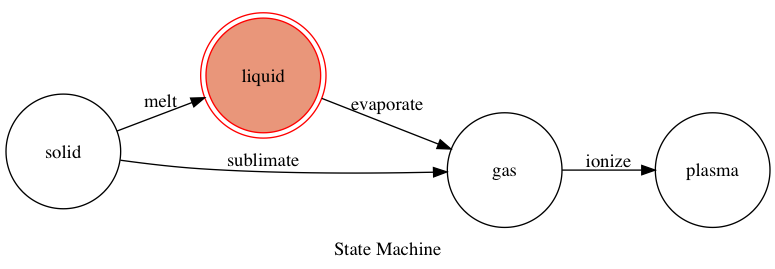

### or just the region of interest
(previous state, active state and all reachable states)

In [33]:
lump.get_graph(show_roi=True).draw('my_state_diagram.png', prog='dot')

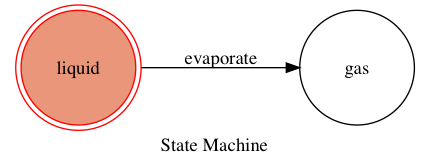

# apps

## 用状态机来表示财管

entity：三张表：资产负债表Balance sheet、现金流量表Cash flow statement、利润表Income statement

events行为：

付房租  购买设备  发工资

生产产品  销售产品

贷款  

资产
    长期资产
    流动资产

长期负债long-term liability：
流动负债
所有者权益

短期偿债能力
    营运资本 = 流动资产 - 流动负债
    营运资本配置比率
    流动比率
    速动比率
    现金比率

现金流量比率

长期偿债能力
    资产负债率 = 负债/资产
    两种常见的财务杠杆比率
    产权比率 = 负债/权益
    权益乘数 = 资产/权益

    利息保障倍数
    现金流量利息保障倍数

    现金流量债务比


营运能力
周转次数 = 营业收入/各种资产
周转天数 = 365/周转次数
销售百分比(与收入比) = 资产/营业收入

盈利能力
传统财务报表
营业净利率 = 净利润/营业收入
总资产净利率 = 净利润/总资产
权益净利率 = 净利润/股东权益
管理用报表
税后经营净利率 = 税后经营净利润/
净经营资产净利率 = 税后经营净利润/净经营资产


市价比率
市盈率PE = 每股市价/每股收益
市净率PB = 每股市价/每股净资产
市销率PS = 每股市价/每股营业收入


杜邦分析公式
权益净利率 = 总资产净利率*权益乘数 = 营业净利率*总资产周转率*权益乘数

In [34]:
from transitions import Machine

In [84]:
class BalanceSheet:
    states = ['open', 'bankrupt']
    def __init__(self):
        self.equity = 500000
        self.debt = 0
        self.cash = 500000
        self.machine = Machine(model=self, states=BalanceSheet.states, initial='open')
        self.machine.add_transition(trigger='loan', source='open', dest='open', after='u')
        
    def getTotalAsset(self):
        """
        总资产
        """
        return self.equity-self.debt
    def u(self, loan=0):
        assert loan > 0
        print(loan)
        self.debt = self.debt + loan
        if self.getTotalAsset() < 0:
            self.state = 'bankrupt'
            print(self.getTotalAsset())
        print(self.state)

In [85]:
bs = BalanceSheet()

In [88]:

bs.loan(1500000000)

MachineError: "Can't trigger event loan from state bankrupt!"

In [87]:
bs.debt

1500000000

In [72]:
bs.state

'asleep'

In [55]:
bs